### **Regressão Linear - Métodos dos Minímos Quadrados**

In [1]:
import numpy as np 
import pandas as pd 
import sympy as sp
import matplotlib.pyplot as plt

### **tabela de entrada**

In [11]:
url = "https://raw.githubusercontent.com/erkansirin78/datasets/master/Advertising.csv"

dados = pd.read_csv(url)
dados.drop("ID", axis=1 , inplace=True)
dados.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [3]:
vendas = dados['Sales']
tv = dados['TV']
radio = dados['Radio']
jornal = dados['Newspaper']

tabela = pd.DataFrame({
    'X': tv,
    'Y': vendas
})

tabela.index = tabela.index + 1
tabela.index.name = 'mercado'
tabela


,X,Y
mercado,,
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9
...,...,...
196,38.2,7.6
197,94.2,9.7
198,177.0,12.8


### **correlação de Pearson**

In [4]:
r = tabela['X'].corr(tabela['Y'])
coef_det = r ** 2

print(f'coeficiente de correlação de Pearson = {r:.6f}')
print(f'coefeciente de determinação = {coef_det*100:.2f}%')

coeficiente de correlação de Pearson = 0.782224
coefeciente de determinação = 61.19%


### **Sistema de equações**

In [5]:
n, _ = tabela.shape

soma_x = tabela['X'].sum()
soma_y = tabela['Y'].sum()

soma_xy = (tabela['X'] * tabela['Y']).sum()
soma_x2 = (tabela['X'] ** 2).sum()
soma_y2 = (tabela['Y'] ** 2).sum()

a, b, x, y = sp.symbols("a b x y")

display(sp.Eq((-a*n - b*soma_x) * -1, soma_y ))
display(sp.Eq( (- a*soma_x - b*soma_x2) * -1, soma_xy))

Eq(200*a + 29408.5*b, 2804.5)

Eq(29408.5*a + 5791118.39*b, 482108.34)

### **Equação da reta**

In [6]:
b = (n * soma_xy - soma_x*soma_y) / (n * soma_x2 - soma_x**2)
a = (soma_y - soma_x*b) / n

equacao_reta = sp.Eq(y, a + b*x)
equacao_reta

def f(x):
    return a + b*x

Eq(y, 0.0475366404330197*x + 7.03259354912769)

### **Inferência**

In [7]:
rng = np.random.default_rng()
vls = rng.permuted(np.arange(0, 200))[:10]
vls.sort()

tabela_inf = pd.DataFrame({
    'X': vls,
    'Y': f(vls)
})

tabela_inf

,X,Y
0,28,8.363619
1,31,8.506229
2,47,9.266816
3,73,10.502768
4,108,12.166551
5,119,12.689454
6,131,13.259893
7,143,13.830333
8,156,14.448309
9,191,16.112092


### **Gráfico**

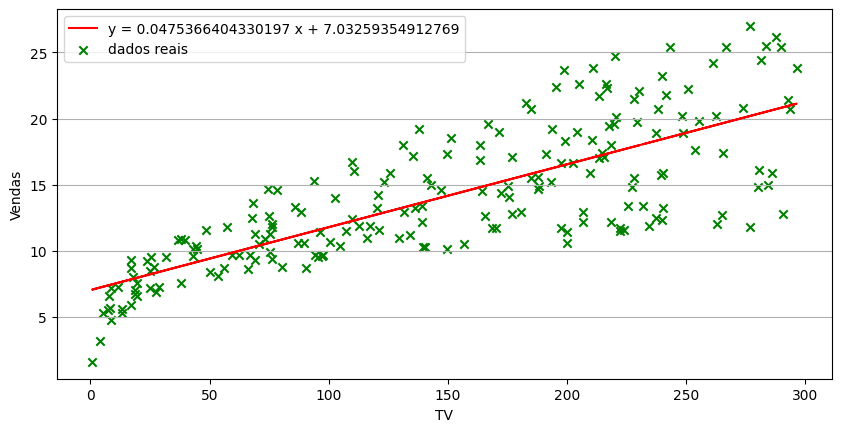

In [9]:
fig, ax = plt.subplots()

fig.set_figwidth(10)

ax.plot(tabela['X'], f(tabela['X']), 'r', label= sp.latex(equacao_reta));
ax.scatter(tabela['X'], tabela['Y'], c='green' ,label= 'dados reais', marker='x')

ax.set_xlabel('TV')
ax.set_ylabel('Vendas')

ax.legend();

ax.grid(axis='y')